First, let's import required packages. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget
import os.path
from os import path
import matplotlib.image as mpimg 
import PIL
import random


In [2]:
metaData = pd.read_csv('https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv')
metaData.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,...,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [3]:
metaData.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,684.000000,693.000000,74.000000,119.000000,16.000000,28.000000,37.000000
mean,8.887427,53.810967,38.933784,78.475630,5.024375,5.307143,4.965459
std,31.727803,16.822184,6.667120,38.742573,2.660341,3.489956,21.354733
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.725000,55.000000,3.067500,2.725000,0.800000
50%,5.000000,55.000000,38.200000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,69.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [4]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               930 non-null    object 
 1   offset                  684 non-null    float64
 2   sex                     850 non-null    object 
 3   age                     693 non-null    float64
 4   finding                 930 non-null    object 
 5   RT_PCR_positive         582 non-null    object 
 6   survival                358 non-null    object 
 7   intubated               243 non-null    object 
 8   intubation_present      246 non-null    object 
 9   went_icu                392 non-null    object 
 10  in_icu                  331 non-null    object 
 11  needed_supplemental_O2  88 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             74 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [5]:
import datetime
metaData['date'].fillna(method='ffill', inplace=True)
#metaData['date'] = pd.to_datetime(metaData['date'])

In [6]:
drop_column_list = ['needed_supplemental_O2', 'extubated', 
                    'temperature', 'pO2_saturation', 'leukocyte_count',
                    'neutrophil_count', 'lymphocyte_count',
                    'doi','url', 'license', 'clinical_notes', 'other_notes']
metaData.drop(drop_column_list, axis=1, inplace=True)

In [7]:
metaData['sex'].fillna('Unknown', inplace=True)
metaData['RT_PCR_positive'].fillna('Unknown', inplace=True)
metaData['survival'].fillna('Unknown', inplace=True)
metaData['intubated'].fillna('Unknown', inplace=True)
metaData['intubation_present'].fillna('Unknown', inplace=True)
metaData['went_icu'].fillna('Unknown', inplace=True)
metaData['in_icu'].fillna('Unknown', inplace=True)
metaData['location'].fillna('Unknown', inplace=True)

In [8]:
metaData['offset'].fillna(np.mean(metaData['offset']), inplace=True)
metaData['age'].fillna(np.mean(metaData['age']), inplace=True)

In [9]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patientid           930 non-null    object 
 1   offset              930 non-null    float64
 2   sex                 930 non-null    object 
 3   age                 930 non-null    float64
 4   finding             930 non-null    object 
 5   RT_PCR_positive     930 non-null    object 
 6   survival            930 non-null    object 
 7   intubated           930 non-null    object 
 8   intubation_present  930 non-null    object 
 9   went_icu            930 non-null    object 
 10  in_icu              930 non-null    object 
 11  view                930 non-null    object 
 12  modality            930 non-null    object 
 13  date                930 non-null    object 
 14  location            930 non-null    object 
 15  folder              930 non-null    object 
 16  filename

In [10]:
metaData.drop_duplicates(inplace=True)

In [11]:
metaData['finding'].unique()

array(['COVID-19', 'ARDS', 'SARS', 'Pneumocystis', 'Streptococcus',
       'No Finding', 'Chlamydophila', 'E.Coli', 'COVID-19, ARDS',
       'Klebsiella', 'Legionella', 'Unknown', 'Pneumonia', 'Lipoid',
       'Varicella', 'Bacterial', 'Mycoplasma Bacterial Pneumonia',
       'Influenza', 'Cryptogenic Organizing Pneumonia', 'Lobar Pneumonia',
       'Multilobar Pneumonia', 'Organizing Pneumonia',
       'Eosinophilic Pneumonia', 'Unusual Interstitial Pneumonia',
       'Lymphocytic Interstitial Pneumonia',
       'Desquamative Interstitial Pneumonia', 'todo',
       'Spinal Tuberculosis',
       'Swine-Origin Influenza A (H1N1) Viral Pneumonia', 'Tuberculosis',
       'Invasive Aspergillosis', 'Herpes pneumonia',
       'Herpes pneumonia, ARDS',
       'Accelerated Phase Usual Interstitial Pneumonia',
       'Round pneumonia', 'Lymphocytic interstitial pneumonia',
       'Allergic bronchopulmonary aspergillosis ',
       'Cryptogenic organising pneumonia',
       'Chronic eosinophilic 

In [12]:
metaData['COVID-19'] = metaData['finding'].apply(lambda x: True if ('COVID-19' in x) else False)

In [13]:
image_directory = '../Data/images'
url = "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/"

remove_row_list = []
for i in range(metaData.shape[0]):
    filename = metaData.iloc[i,:]['filename']
    if not path.exists('../Data/images/'+filename):
        try:
            wget.download(url+filename, out=image_directory)
        except:
            print(i, filename, "not found")
            remove_row_list.append(i)

metaData.drop(remove_row_list, axis=0, inplace=True)

53 radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz not found
56 radiopaedia_org_covid-19-pneumonia-14_85914_0-dcm.nii.gz not found
225 coronacases_org_001.nii.gz not found
226 coronacases_org_002.nii.gz not found
227 coronacases_org_003.nii.gz not found
228 coronacases_org_004.nii.gz not found
229 coronacases_org_005.nii.gz not found
230 coronacases_org_006.nii.gz not found
231 coronacases_org_007.nii.gz not found
232 coronacases_org_008.nii.gz not found
233 coronacases_org_009.nii.gz not found
234 coronacases_org_010.nii.gz not found
235 radiopaedia_org_covid-19-pneumonia-4_85506_1-dcm.nii.gz not found
236 radiopaedia_org_covid-19-pneumonia-29_86490_1-dcm.nii.gz not found
237 radiopaedia_org_covid-19-pneumonia-29_86491_1-dcm.nii.gz not found
241 radiopaedia_org_covid-19-pneumonia-23_86359_0-dcm.nii.gz not found
242 radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii.gz not found
243 radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii.gz not found
244 radiopaedia_org_covid-

In [14]:
metaData.shape

(909, 18)

In [15]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 929
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patientid           909 non-null    object 
 1   offset              909 non-null    float64
 2   sex                 909 non-null    object 
 3   age                 909 non-null    float64
 4   finding             909 non-null    object 
 5   RT_PCR_positive     909 non-null    object 
 6   survival            909 non-null    object 
 7   intubated           909 non-null    object 
 8   intubation_present  909 non-null    object 
 9   went_icu            909 non-null    object 
 10  in_icu              909 non-null    object 
 11  view                909 non-null    object 
 12  modality            909 non-null    object 
 13  date                909 non-null    object 
 14  location            909 non-null    object 
 15  folder              909 non-null    object 
 16  filename

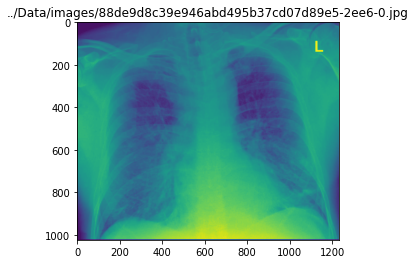

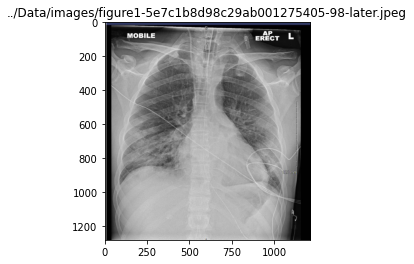

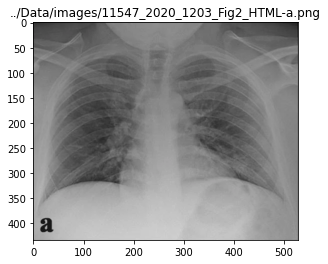

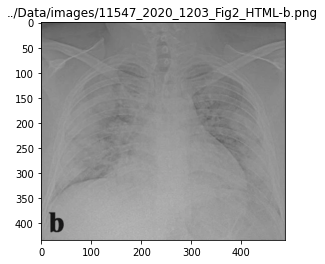

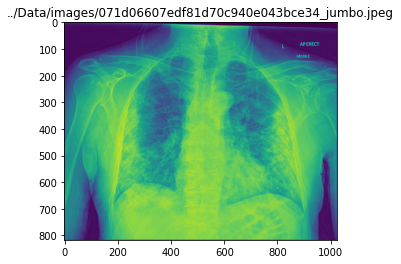

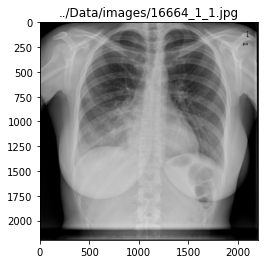

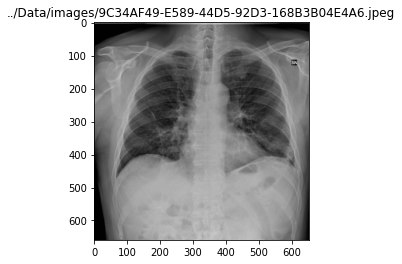

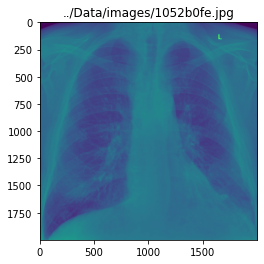

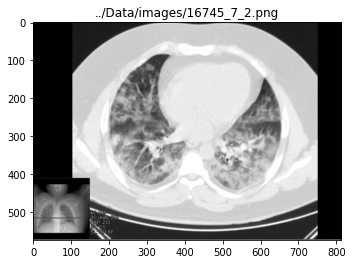

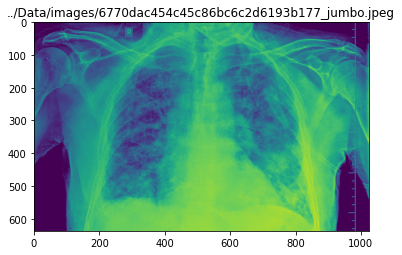

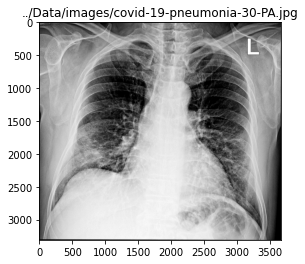

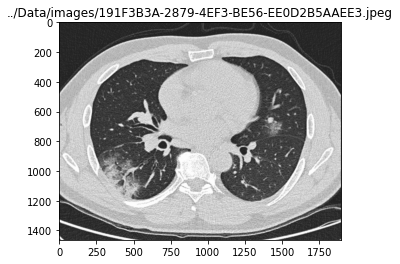

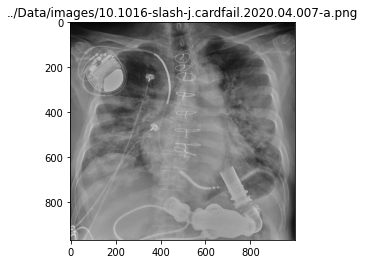

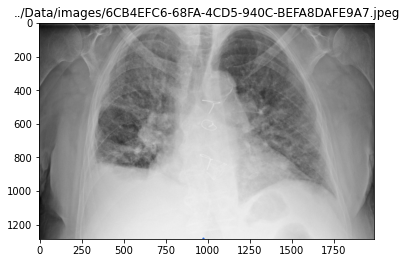

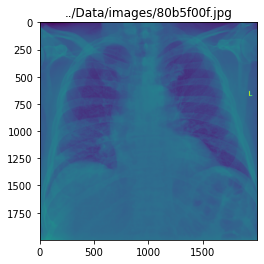

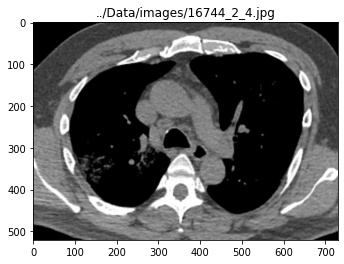

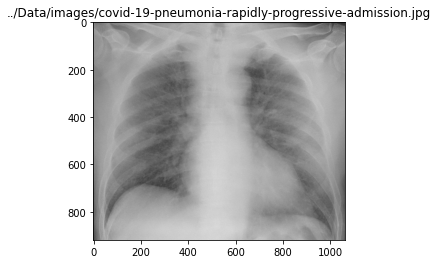

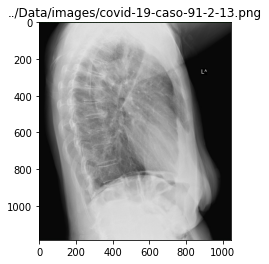

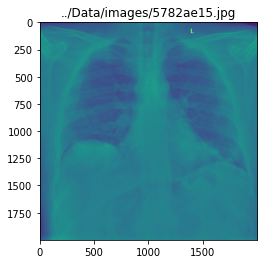

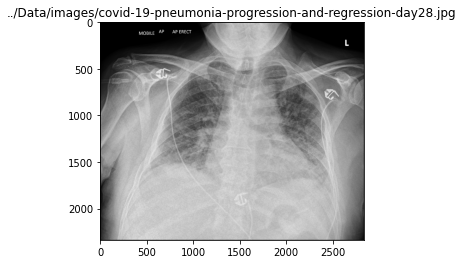

In [16]:
covid_positive = metaData[metaData['COVID-19']]
index = random.sample(range(covid_positive.shape[0]), 20)
for i in index:
    filename = '../Data/images/' + covid_positive.iloc[i,:]['filename']
    img = mpimg.imread(filename) 
    plt.imshow(img)
    plt.title(filename)
    plt.show()

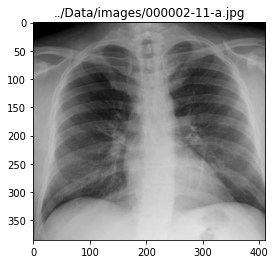

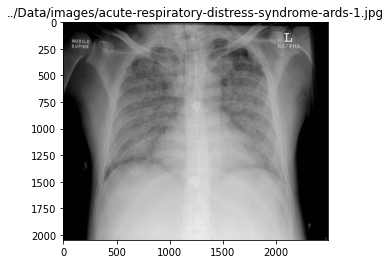

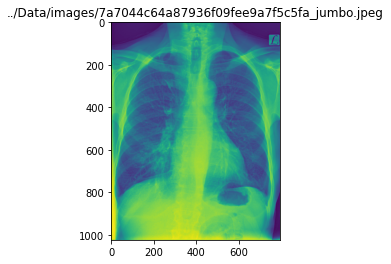

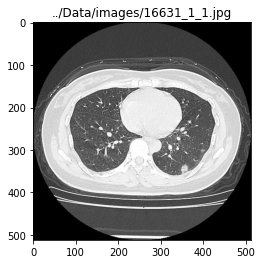

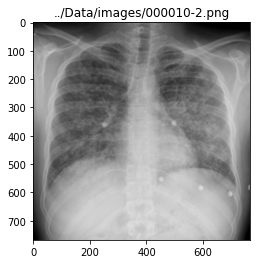

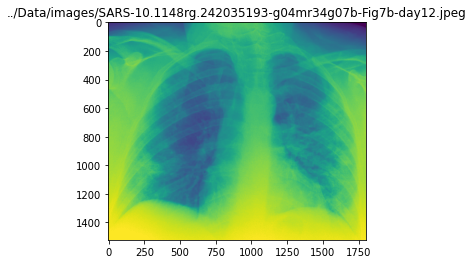

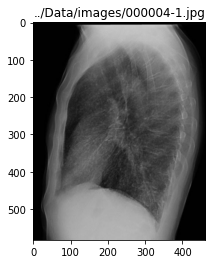

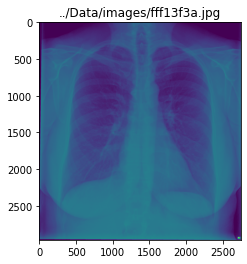

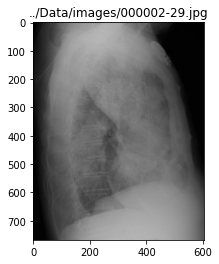

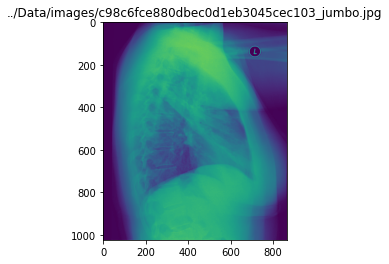

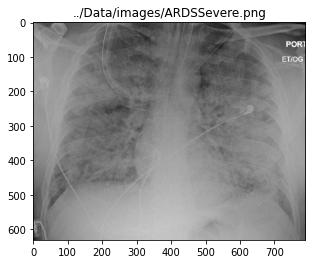

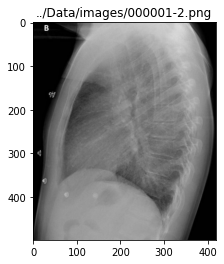

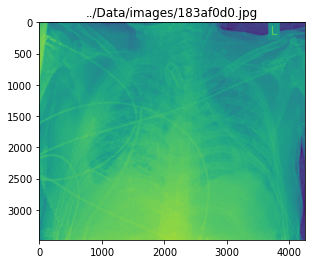

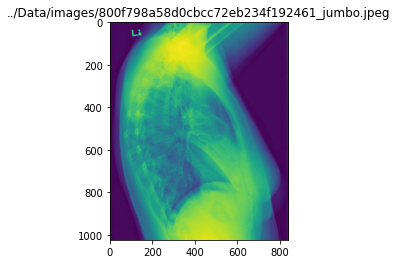

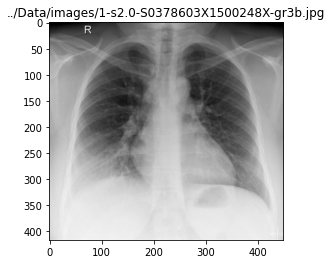

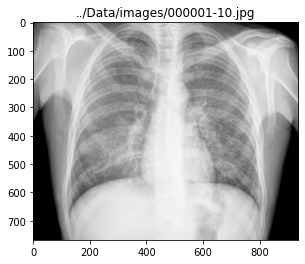

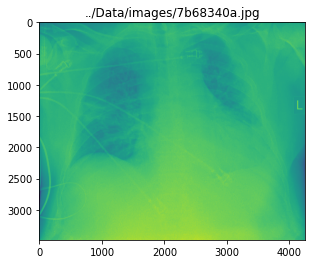

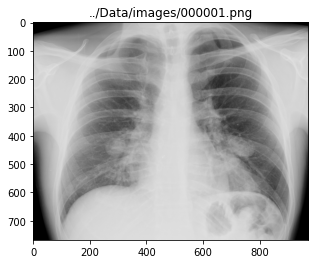

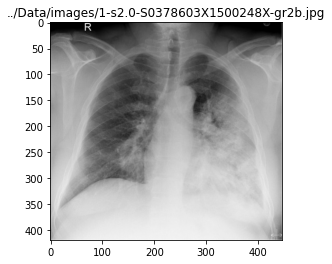

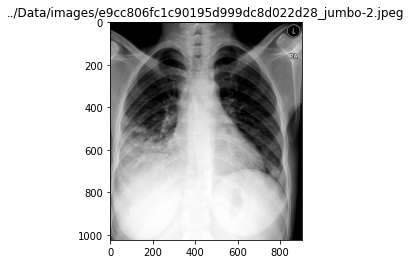

In [17]:
covid_negative = metaData[~metaData['COVID-19']]
index = random.sample(range(covid_negative.shape[0]), 20)
for i in index:
    filename = '../Data/images/' + covid_negative.iloc[i,:]['filename']
    img = mpimg.imread(filename) 
    plt.imshow(img)
    plt.title(filename)
    plt.show()